<font size = 5><u><b>Exploratory Data Analysis </u></b> </font>

<p>Exploratory data analysis or in short EDA is an approach to analyze data in order to summarize main characteristics of the data gain better understanding of the data set, uncover relationships between different variables, and extract important variables for the problem we're trying to solve.</p>

We are going to cover the following things: <br>
            - Analysing individual columns (Continuous, Categorical)<br> 
            - Descriptive Statistics<br>
            - Grouping of columns (pivot table, heatmap) <br>
            - Correlation and Causation (P-values) <br>
            - ANOVA: Analysis of Variance (F-test score, P-value)

In [51]:
import pandas as pd
import numpy as np

df = pd.read_csv("automobileEDA.csv")
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#to plot in a Jupyter notebook

When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [12]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [13]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_1372\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.528667,-0.522159,-0.334736,-0.208303,-0.516420,-0.246281,-0.169342,-0.257013,-0.020539,-0.141755,0.016301,0.264971,0.013028,0.078220,-0.144078
normalized-losses,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,-0.522159,-0.074362,1.000000,0.871641,0.811949,0.558956,0.808489,0.650577,0.580484,0.164012,0.295342,0.503615,-0.304538,-0.535380,-0.572540,0.726600
length,-0.334736,0.023220,0.871641,1.000000,0.837930,0.496802,0.869949,0.716208,0.649059,0.116049,0.190043,0.659407,-0.241771,-0.683543,-0.690581,0.756060
width,-0.208303,0.105073,0.811949,0.837930,1.000000,0.283885,0.870256,0.756317,0.575048,0.192891,0.261152,0.675741,-0.223720,-0.644124,-0.674959,0.841883
height,-0.516420,-0.432335,0.558956,0.496802,0.283885,1.000000,0.358663,0.174557,0.261501,-0.095364,0.236149,0.011204,-0.311552,-0.112150,-0.146788,0.224936
curb-weight,-0.246281,0.119893,0.808489,0.869949,0.870256,0.358663,1.000000,0.867894,0.646640,0.171691,0.226822,0.784320,-0.255611,-0.732746,-0.765103,0.891750
engine-size,-0.169342,0.167365,0.650577,0.716208,0.756317,0.174557,0.867894,1.000000,0.597336,0.296693,0.146519,0.768618,-0.334210,-0.599425,-0.625054,0.807566
bore,-0.257013,-0.036167,0.580484,0.649059,0.575048,0.261501,0.646640,0.597336,1.000000,-0.105464,0.019216,0.557107,-0.315841,-0.585618,-0.586729,0.534891
stroke,-0.020539,0.065627,0.164012,0.116049,0.192891,-0.095364,0.171691,0.296693,-0.105464,1.000000,0.240895,0.149315,-0.008569,-0.021381,-0.013974,0.158798


In [15]:
#finding correlation between specific columns
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.105464,0.019216,0.557107
stroke,-0.105464,1.000000,0.240895,0.149315
compression-ratio,0.019216,0.240895,1.000000,-0.164042
horsepower,0.557107,0.149315,-0.164042,1.000000


<h3> Continuous Numerical Variables </h3> 
Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines - using regplot

,engine-size,price
engine-size,1.000000,0.807566
price,0.807566,1.000000


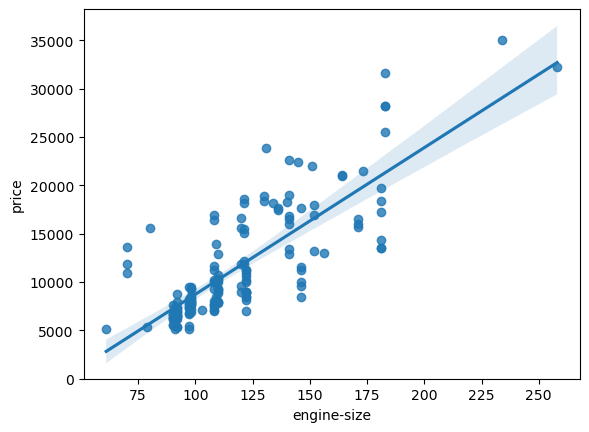

In [22]:
#scatterplot of "engine-size" and "price"
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

df[["engine-size", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.709135
price,-0.709135,1.000000


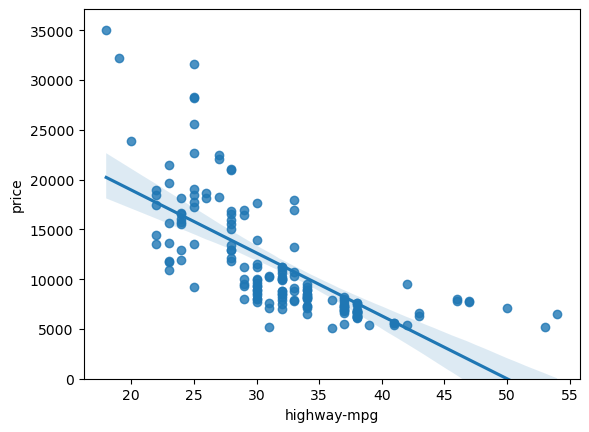

In [19]:
#scatterplot of "highway-mpg" and "price"
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

df[["highway-mpg", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.154289
price,-0.154289,1.000000


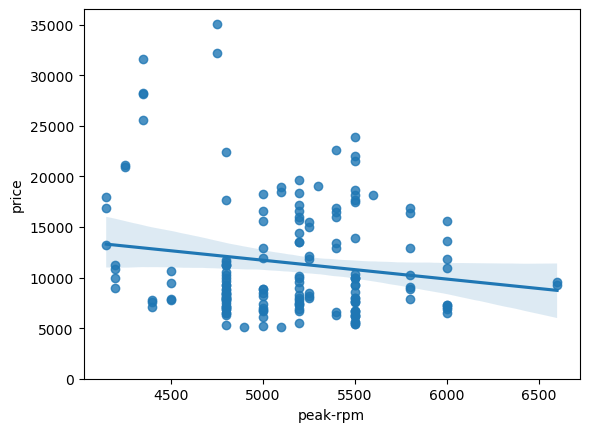

In [20]:
#scatterplot of "peak-rpm" and "price"
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

df[["peak-rpm", "price"]].corr()

It is visible that Peak rpm is not a good predictor of the price since the reg line is horizontal, showing a weak linear relationship.

,stroke,price
stroke,1.000000,0.158798
price,0.158798,1.000000


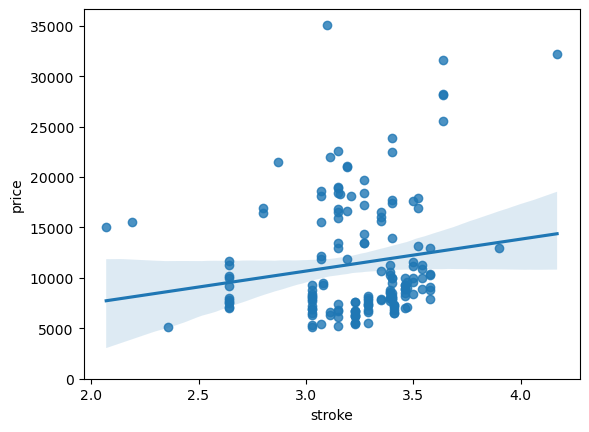

In [21]:
#scatterplot of "stroke" and "price"
sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)

df[["stroke", "price"]].corr()

<h3>Categorial Variable</h3> These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<Axes: xlabel='body-style', ylabel='price'>

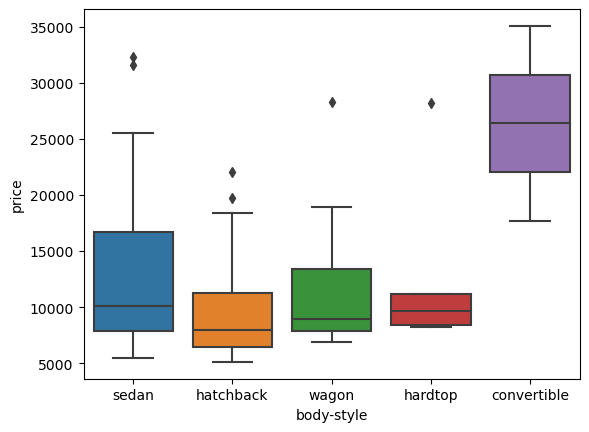

In [23]:
#boxplot between "body-style" and "price"
sns.boxplot(x= "body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

<Axes: xlabel='drive-wheels', ylabel='price'>

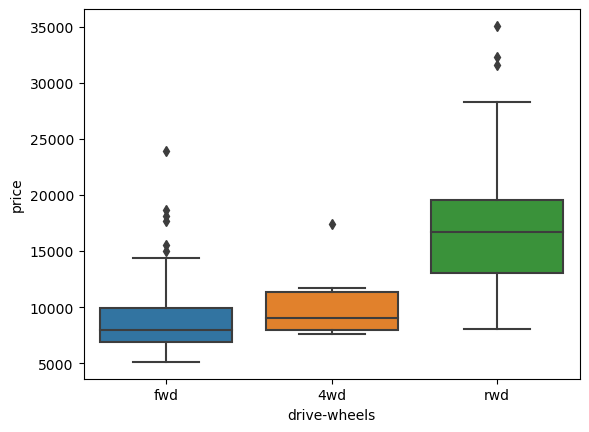

In [30]:
#boxplot between "drive-wheels" and "price"
sns.boxplot(x="drive-wheels", y="price", data=df)

<h3> <u> Descriptive Statistics </u></h3>
One of the methods is by using <code>describe</code> function which shows - 
<ul> 
<li> count   <li> mean   <li> std ie standard deviation 
<li> min value   <li> max value  <li> IQR ir Interquartile Range: 25%, 50%, 75%
</ul>

<p><code> value_counts </code> is a good way of understanding how many units of each characteristic/variable we have. </p>
Note: value_counts only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']]. <br>
<code> .to_frame() </code> is used to convert the output series to a dataframe



In [31]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,160.000000,160.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.792683,122.000000,98.164024,172.238415,65.598780,53.774390,2458.274390,117.957317,3.298437,3.237312,10.126951,96.207317,5137.804878,26.268293,31.847561,11466.518293
std,1.225874,35.442168,5.120198,11.417833,1.923028,2.343942,475.087068,30.896294,0.267348,0.294210,3.836306,30.408563,479.459113,6.193305,6.514349,5803.490319
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.675000,64.000000,52.000000,2090.750000,97.000000,3.050000,3.107500,8.700000,69.000000,4800.000000,22.000000,28.000000,7446.000000
50%,1.000000,115.000000,96.550000,172.000000,65.400000,54.100000,2367.500000,109.000000,3.270000,3.270000,9.000000,91.000000,5200.000000,26.000000,32.000000,9268.500000
75%,2.000000,150.000000,100.400000,177.800000,66.500000,55.500000,2785.500000,131.750000,3.550000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14559.250000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


In [52]:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [38]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,106
rwd,50
4wd,8


In [53]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


The <code> groupby</code> method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

In [60]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [62]:
#creating a pivot table
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style').fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

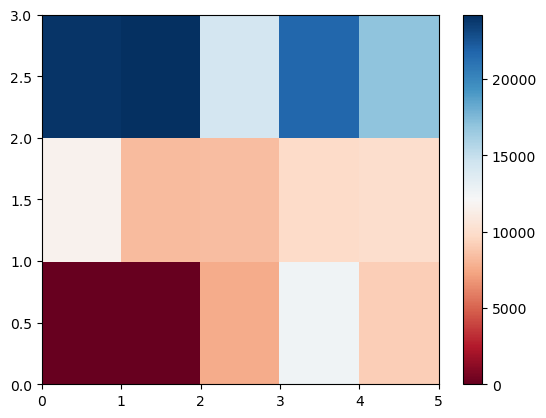

In [69]:
#creating a heat map
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

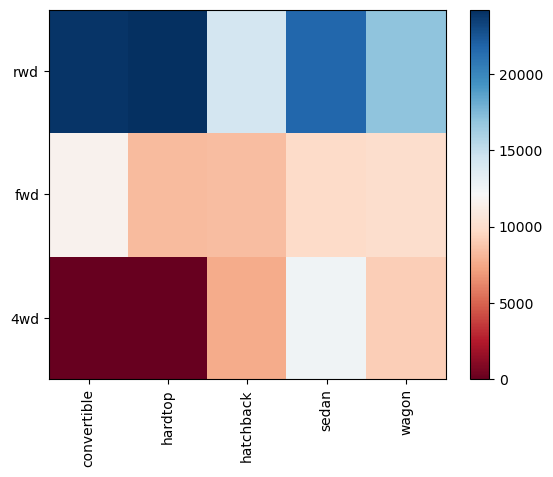

In [73]:
#The default labels convey no useful information to us. Let's change that
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap = 'RdBu')

#creating labels
row_labels= grouped_pivot.columns.levels[1]
col_labels= grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#inserting labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotating label since they might be too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h3> Correlation and Causation </h3>
<p><b>Correlation</b> is a measure of the extent of interdependence between variables, and <br>
<b>Causation</b> is the relationship between cause and effect between two variables. </p>

<p><b>The Pearson Correlation </b> measures the linear dependence between two variables X and Y.<br>
The resulting coefficient is a value between -1 and 1 inclusive. </p>

<p> <b> The P-value </b> is the probability value that the correlation between these two variables is statistically significant. <br>
Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. </p>

In [84]:
from scipy import stats

#wheel-base vs Price
pearson_coeff, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("Between wheel-base and price")
print("The Pearson Corr. Coefficient is", pearson_coeff, " with a P-value of P =", p_value)

#horsepower vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("\nBetween horsepower and price")
print("The Pearson Corr. Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

#length vs price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("\nBetween length and price")
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  


Between wheel-base and price
The Pearson Corr. Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20

Between horsepower and price
The Pearson Corr. Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259557e-48

Between length and price
The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158986e-30


<b>Wheel-base vs price:</b> p-value < 0.001 so the corr. is significant but the linear relationship isnt extremely strong. <br>
<b>Horsepower vs price:</b> p-value < 0.001 so corr. is significant and the linear relationship is quite strong (~0.809, close to 1). <br>
<b>Length vs price: </b> p-value < 0.001 so corr. is significant and the linear relationship is moderately strong. <br>
<br> We can continue doing this for all the remaining columns as well.

<h3>ANOVA: Analysis of Variance </h3>
A statistical method used to test whether there are significant differences between the means of two or more groups. 
<p>ANOVA returns two parameters:

<b>F-test score:</b> ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means. <br>

<b>P-value:</b> P-value tells how statistically significant our calculated score value is.</p>

In [85]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.get_group('4wd')['price']

# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance.